

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('zillow_data.csv')

In [5]:
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [7]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

# Step 2: Data Preprocessing

In [8]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [9]:
column_names = df.columns[7:]

In [10]:
column_names

Index(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=265)

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 272 columns):
RegionID      int64
RegionName    int64
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
1998-03       float64
1998-04       float64
1998-05       float64
1998-06       float64
1998-07       float64
1998-08       float64
1998-09       float64
1998-10       float64
1998-11       float64
1998-12       float64
1999-01       float6

In [12]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [13]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [14]:
df[column_names] = df[column_names].astype(float)

In [15]:
df['RegionID'] = df['RegionID'].astype(str)

In [16]:
df.info(verbose=True)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 272 columns):
RegionID      object
RegionName    int64
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
1998-03       float64
1998-04       float64
1998-05       float64
1998-06       float64
1998-07       float64
1998-08       float64
1998-09       float64
1998-10       float64
1998-11       float64
1998-12       float64
1999-01       float

## Filtering the properties

In [18]:
# The properties need to be filtered down according to the investment criteria
# It should be 

In [9]:
#Calculate historical return on investment
df = df.loc[(df['2018-04'] <=110000) & (df['2018-04'] >= 90000)]
df['ROI']= (df['2018-04']/df['2010-04'])-1
#Calculate standard deviation of monthly values
df['std']=df.loc[:,'2010-04':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'2010-04':'2018-04'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
df['CV']=df['std']/df['mean']
#Show calculated values
df[['RegionName','std','mean','ROI','CV']].head()

#Descriptive statistics of coefficients of variance.
print(df.CV.describe())
#Define upper limit of CV according to risk profile.
upper_cv = df.CV.quantile(.6)
print(f'\nCV upper limit: {upper_cv}')
#Get the 5 zipcodes with highest ROIs within the firms risk profile.
top10 = df[df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]
print('\n Top 10 Zipcodes:')
top10[['RegionName','ROI','CV', 'City']]

count    984.000000
mean       0.080863
std        0.042157
min        0.005681
25%        0.051881
50%        0.071630
75%        0.100785
max        0.300329
Name: CV, dtype: float64

CV upper limit: 0.0807765869299169

 Top 10 Zipcodes:


,RegionName,ROI,CV,City
13971,42355,0.465812,0.075867,Maceo
14178,14889,0.406332,0.072932,Van Etten
12045,55741,0.390402,0.072142,Gilbert
13380,74726,0.365952,0.056380,Bokchito
9613,64730,0.334975,0.066324,Butler
11825,31519,0.333333,0.070636,Broxton
12219,39746,0.323760,0.073257,Hamilton
2619,14304,0.322500,0.071525,Niagara Falls
9624,37722,0.320210,0.077735,Cosby
11972,65723,0.316971,0.048009,Pierce City


In [37]:
df['RegionName'] = df['RegionName'].astype(str)
df2=df.copy()

In [41]:
df2

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
26,92515,78572,Mission,TX,McAllen,Hidalgo,27,69900.0,69700.0,69600.0,...,100000.0,100100.0,99700.0,100200.0,102100.0,103900.0,0.276413,6504.749785,86901.030928,0.074852
92,76953,44035,Elyria,OH,Cleveland,Lorain,93,83000.0,83200.0,83300.0,...,89100.0,89800.0,90600.0,90900.0,91100.0,91500.0,-0.010811,4791.294771,82578.350515,0.058021
121,79040,48180,Taylor,MI,Detroit,Wayne,122,69000.0,69500.0,69800.0,...,90300.0,91700.0,93000.0,94000.0,95100.0,96200.0,0.667244,14236.605434,64510.309278,0.220687
232,69533,27834,Greenville,NC,Greenville,Pitt,233,NaN,NaN,NaN,...,95900.0,96300.0,97000.0,98300.0,100200.0,101200.0,0.000000,4587.199244,93777.319588,0.048916
269,76796,43701,Zanesville,OH,Zanesville,Muskingum,270,63000.0,62900.0,62800.0,...,99000.0,100400.0,100700.0,101300.0,103400.0,105100.0,0.142391,3717.301311,91197.938144,0.040761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14618,87043,66023,Effingham,KS,Atchison,Atchison,14619,NaN,NaN,NaN,...,93100.0,92100.0,92600.0,93200.0,92800.0,91400.0,-0.003272,12680.467957,99010.309278,0.128072
14627,78387,46987,Sweetser,IN,Marion,Grant,14628,57000.0,57100.0,57400.0,...,90600.0,91300.0,91400.0,92200.0,96100.0,100300.0,0.034021,2741.303415,93623.711340,0.029280
14639,80140,50106,Gilman,IA,Marshalltown,Marshall,14640,54500.0,54700.0,55000.0,...,87400.0,85900.0,88200.0,91100.0,91700.0,91900.0,0.061201,3380.092251,87448.453608,0.038652
14660,88072,68633,Dodge,NE,Fremont,Dodge,14661,NaN,NaN,NaN,...,85800.0,85500.0,85400.0,86200.0,88500.0,90300.0,NaN,3583.625647,81790.243902,0.043815


In [43]:
zip1 = df2.loc[df['RegionName']== top10['RegionName'].iloc[0]]
zip1 = zip1.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip1

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
13971,76332,42355,Maceo,KY,Owensboro,Daviess,13972,58900.0,59000.0,59200.0,...,93800.0,94900.0,95700.0,96100.0,96400.0,97000.0,97900.0,98800.0,100800.0,102900.0


In [44]:
zip2 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[1]]
zip2 = zip2.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip2

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14178,63810,14889,Van Etten,NY,Elmira,Chemung,14179,39500.0,39500.0,39400.0,...,98000.0,98600.0,99100.0,99700.0,100400.0,100800.0,100600.0,101900.0,104700.0,106600.0


In [45]:
zip3 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[2]]
zip3 = zip3.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip3

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
12045,82416,55741,Gilbert,MN,Duluth,Saint Louis,12046,45800.0,46000.0,46200.0,...,87000.0,88900.0,91600.0,93800.0,95300.0,96400.0,99000.0,101700.0,104500.0,107200.0


In [46]:
zip4 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[3]]
zip4 = zip4.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip4

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
13380,90500,74726,Bokchito,OK,Durant,Bryan,13381,35200.0,35200.0,35200.0,...,86300.0,86700.0,87900.0,88900.0,89200.0,90200.0,91100.0,93200.0,97900.0,101900.0


In [47]:
zip5 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[4]]
zip5 = zip5.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip5

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9613,86565,64730,Butler,MO,Kansas City,Bates,9614,49500.0,50100.0,50600.0,...,92800.0,93300.0,93800.0,94300.0,94900.0,95400.0,95000.0,97500.0,103600.0,108400.0


In [48]:
zip6 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[5]]
zip6 = zip6.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip6

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
11825,71546,31519,Broxton,GA,Douglas,Coffee,11826,46300.0,46500.0,46600.0,...,77400.0,80100.0,82800.0,84600.0,87000.0,89500.0,91900.0,92500.0,92600.0,93600.0


In [49]:
zip7 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[6]]
zip7 = zip7.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip7

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
12219,75413,39746,Hamilton,MS,NaN,Monroe,12220,NaN,NaN,NaN,...,78600.0,83700.0,88600.0,89800.0,89600.0,90300.0,91000.0,94900.0,99700.0,101400.0


In [50]:
zip8 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[7]]
zip8 = zip8.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip8

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2619,63505,14304,Niagara Falls,NY,Buffalo,Niagara,2620,65600.0,65500.0,65400.0,...,91700.0,92500.0,93600.0,95000.0,97100.0,100500.0,103900.0,105600.0,105800.0,105800.0


In [51]:
zip9 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[8]]
zip9 = zip9.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip9

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9624,74441,37722,Cosby,TN,Newport,Cocke,9625,26400.0,26400.0,26500.0,...,88000.0,89600.0,91100.0,92300.0,93500.0,94600.0,95100.0,95500.0,97700.0,100600.0


In [52]:
zip10 = df2.loc[df2['RegionName'] == top10['RegionName'].iloc[9]]
zip10 = zip10.drop(['ROI', 'std', 'mean', 'CV'], axis =1)
zip10

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
11972,86953,65723,Pierce City,MO,NaN,Lawrence,11973,29900.0,30300.0,30600.0,...,77200.0,78600.0,79600.0,81200.0,83200.0,85500.0,87300.0,90000.0,92500.0,93900.0


# Step 4: Reshape from Wide to Long Format

In [53]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted['value'] = melted['value'].astype(float)
    #return melted
    return melted.groupby('time').aggregate({'value':'mean'})

In [54]:
melted_zip1 = melt_data(zip1)

In [55]:
melted_zip1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
value    265 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [56]:
melted_zip1.head()

,value
time,
1996-04-01,58900.0
1996-05-01,59000.0
1996-06-01,59200.0
1996-07-01,59300.0
1996-08-01,59400.0


In [57]:
melted_zip2 = melt_data(zip2)
melted_zip3 = melt_data(zip3)
melted_zip4 = melt_data(zip4)
melted_zip5 = melt_data(zip5)
melted_zip6 = melt_data(zip6)
melted_zip7 = melt_data(zip7)
melted_zip8 = melt_data(zip8)
melted_zip9 = melt_data(zip9)
melted_zip10 = melt_data(zip10)

## Save melted time series

In [58]:
import pickle
with open('./data/melted_zip1.pickle', 'wb') as f:
    pickle.dump(melted_zip1, f)
with open('./data/melted_zip2.pickle', 'wb') as f:
    pickle.dump(melted_zip2, f)
with open('./data/melted_zip3.pickle', 'wb') as f:
    pickle.dump(melted_zip3, f)
with open('./data/melted_zip4.pickle', 'wb') as f:
    pickle.dump(melted_zip4, f)
with open('./data/melted_zip5.pickle', 'wb') as f:
    pickle.dump(melted_zip5, f)
with open('./data/melted_zip6.pickle', 'wb') as f:
    pickle.dump(melted_zip6, f)
with open('./data/melted_zip7.pickle', 'wb') as f:
    pickle.dump(melted_zip7, f)
with open('./data/melted_zip8.pickle', 'wb') as f:
    pickle.dump(melted_zip8, f)
with open('./data/melted_zip9.pickle', 'wb') as f:
    pickle.dump(melted_zip9, f)
with open('./data/melted_zip10.pickle', 'wb') as f:
    pickle.dump(melted_zip10, f)

# Step 5: ARIMA Modeling

In [155]:
melted_zip1.head()

,value
time,
1996-04-01,58900.0
1996-05-01,59000.0
1996-06-01,59200.0
1996-07-01,59300.0
1996-08-01,59400.0


In [156]:
ts1 = melted_zip1['2010-01-01':]
ts1

,value
time,
2010-01-01,74300.0
2010-02-01,74700.0
2010-03-01,73300.0
2010-04-01,70200.0
2010-05-01,68600.0
...,...
2017-12-01,97000.0
2018-01-01,97900.0
2018-02-01,98800.0


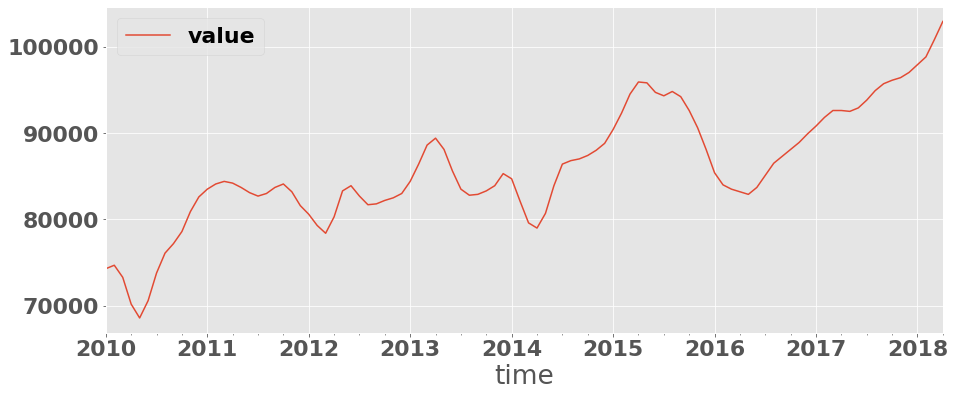

              value
time               
2010-01-01  74300.0
2010-02-01  74700.0
2010-03-01  73300.0
2010-04-01  70200.0
2010-05-01  68600.0


In [160]:
# #m1 = zip1['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [158]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [86]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2533.389462272963
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =72669.02379577774
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1851.2717275982686
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1801.990863824706
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1544.2115304351091
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =2475.7529345443613
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =1637.5140870757436
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =1364.2313117853707
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =1947.85414627622
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1813.6785429037234
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1794.392467559101
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1489.1991539634603
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =1532.9202978479427
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1513.2457253005095
ARIMA (0, 0,

ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =1414.4478243685164
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =1368.4286275502325
ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =1183.9547741702306
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =1308.8053657030478
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1258.0765358133935
ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4457.019941484139
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =1192.3619809517695
ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =1086.9837929418038
ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =nan
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =1213.7515879992263
ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =1215.236347269732
ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =1183.8436760932143
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =1055.0180399217
ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =1048.0079524138168
ARIMA (0, 1, 1) x (2, 1, 2

ARIMA (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =1195.1065222026016
ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =1195.2127197472246
ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =1123.865247379094
ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =1027.9549382870973
ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =1026.3127660067646
ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =2364.4224616799784
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =874.1236847992226
ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =880.0605159023687
ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =817.0164795817957
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1714.450048145767
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1614.0072691975943
ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1275.5960644330223
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1597.82822043988
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1359.1514662754828
ARIMA (1, 0, 

ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =1345.4821781378892
ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =1162.3229314644989
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =1479.3932609719998
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1229.0179586253512
ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =2010.252346378246
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =1351.8671966716702
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =1105.651807866908
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =2078.510069078833
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =1370.744428097757
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =1345.6603527743107
ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =1163.923031182885
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =1271.680422657241
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1218.8463948945612
ARIMA (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4387.151281675202
ARIMA (1, 1, 

ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =1318.095782373502
ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =1127.7876765317774
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =1253.606674649471
ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =1175.5606174293068
ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =2363.599262458445
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =1112.191037507211
ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =1033.7562007419367
ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =3045.2854097745503
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =1162.575698342499
ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =1164.5606644475583
ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =1129.542027536769
ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =1002.5992922491947
ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =1001.1998847522246
ARIMA (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =2423.484196003997
ARIMA (1, 2, 

ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =1165.8542839733996
ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =1168.5884933446605
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =992.3103170007408
ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =994.1277230141942
ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =2232.0031209058598
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =838.0646953637614
ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =839.148682452806
ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =838.0538378160123
ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =1563.4421191058248
ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =1335.5927804304542
ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =1154.8806263471013
ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =1448.6492063144772
ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1221.9972260152717
ARIMA (2, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =2345.8610602787007
ARIMA (2, 1,

ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =1307.5444513171974
ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =1116.831304551373
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =1406.896783060775
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =1169.503464795487
ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =2661.3184214457
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =1293.4333689618607
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =1042.7839142311736
ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =2281.645934483553
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =1325.724621916463
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =1308.2838056325418
ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =1118.7856540335567
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =1176.1864859298998
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =1158.346050002461
ARIMA (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =2622.127043553244
ARIMA (2, 2, 2) 

In [87]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (2, 2, 2)
pdqs    (2, 2, 2, 12)
aic           787.931
Name: 728, dtype: object

In [1]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(0, 2, 1), 
                                        seasonal_order=(0, 0, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

NameError: name 'sm' is not defined

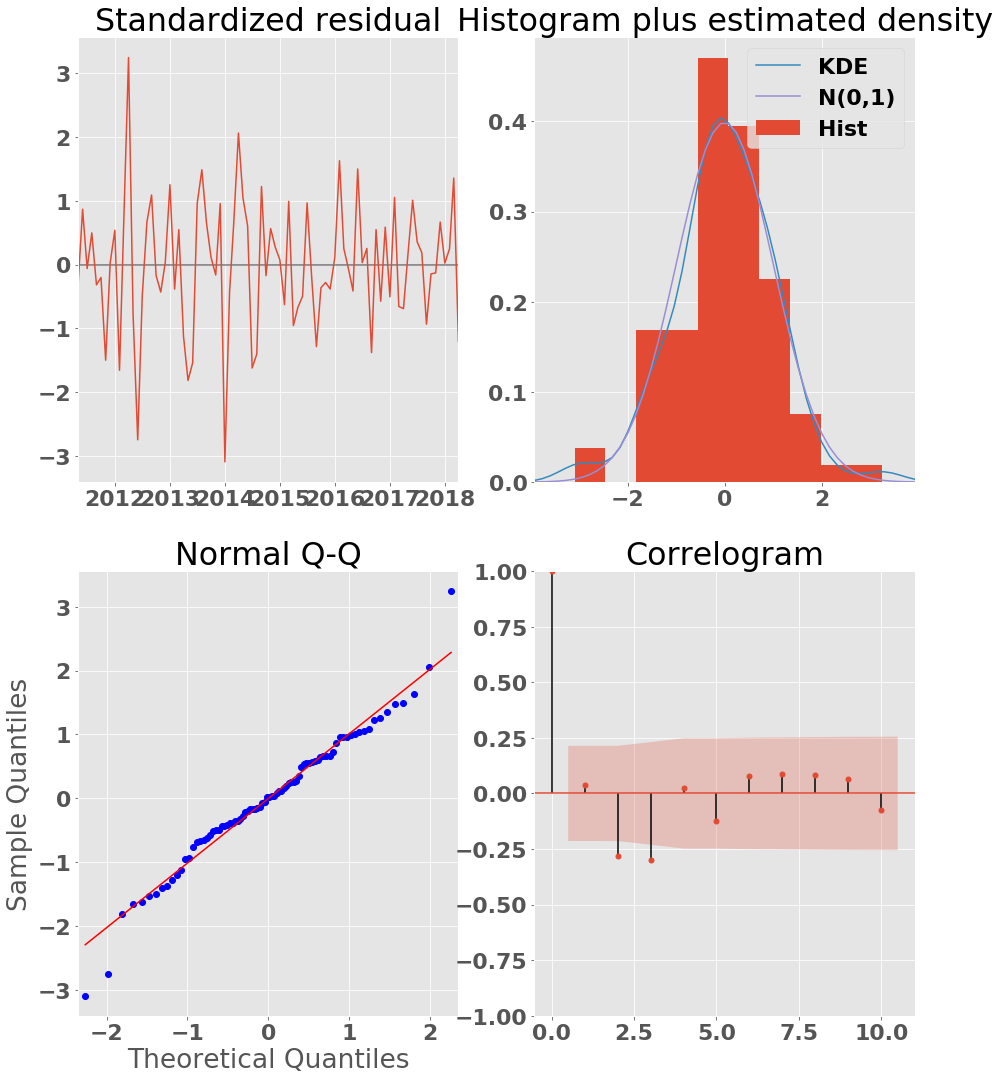

In [162]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [163]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

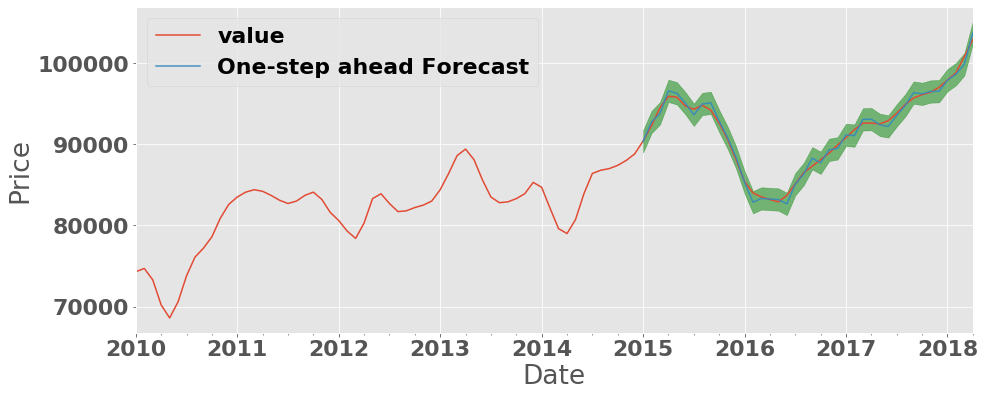

In [164]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [165]:
# pred.predicted_mean

In [183]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 523.78


523.7814938616583


## Dynamic Forecasting

In [180]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

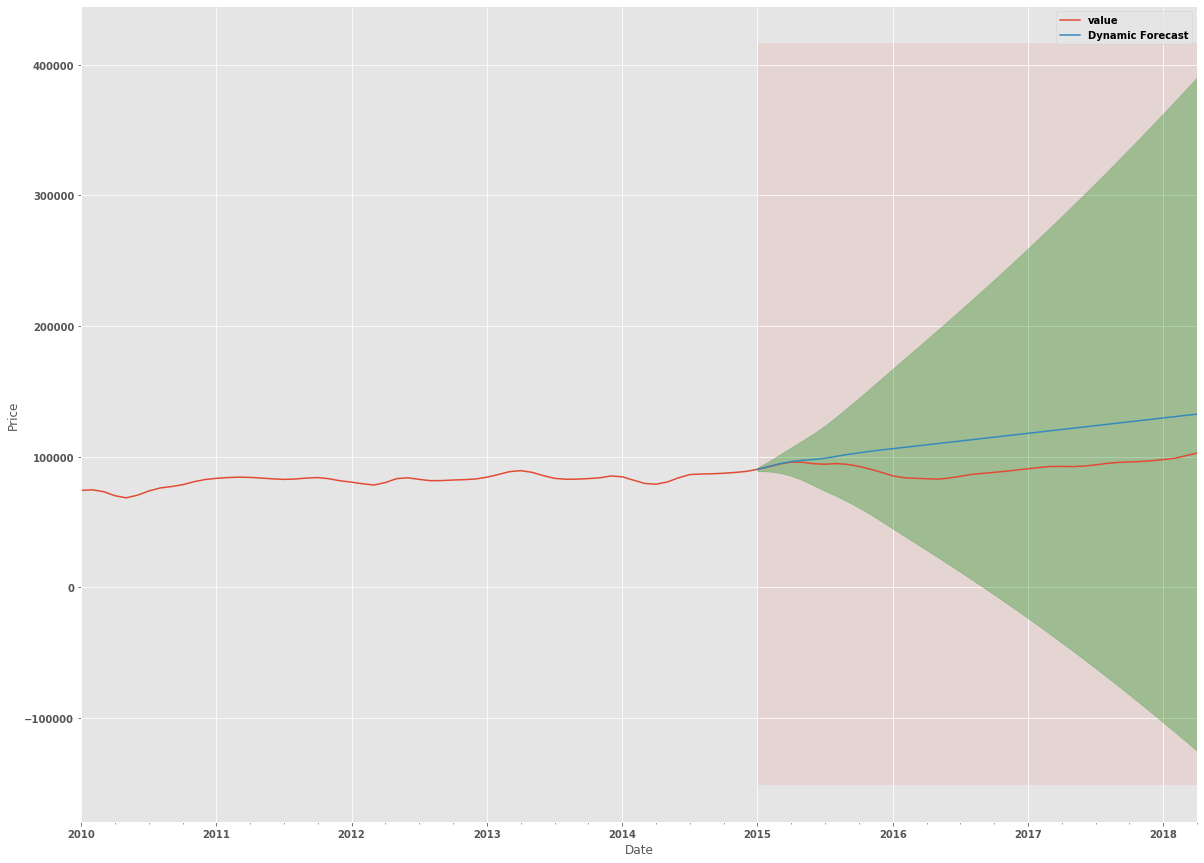

In [188]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [189]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 24025.11


In [190]:
print(mse)

577206144.1155354


## Producing and visualising forecasts

In [191]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

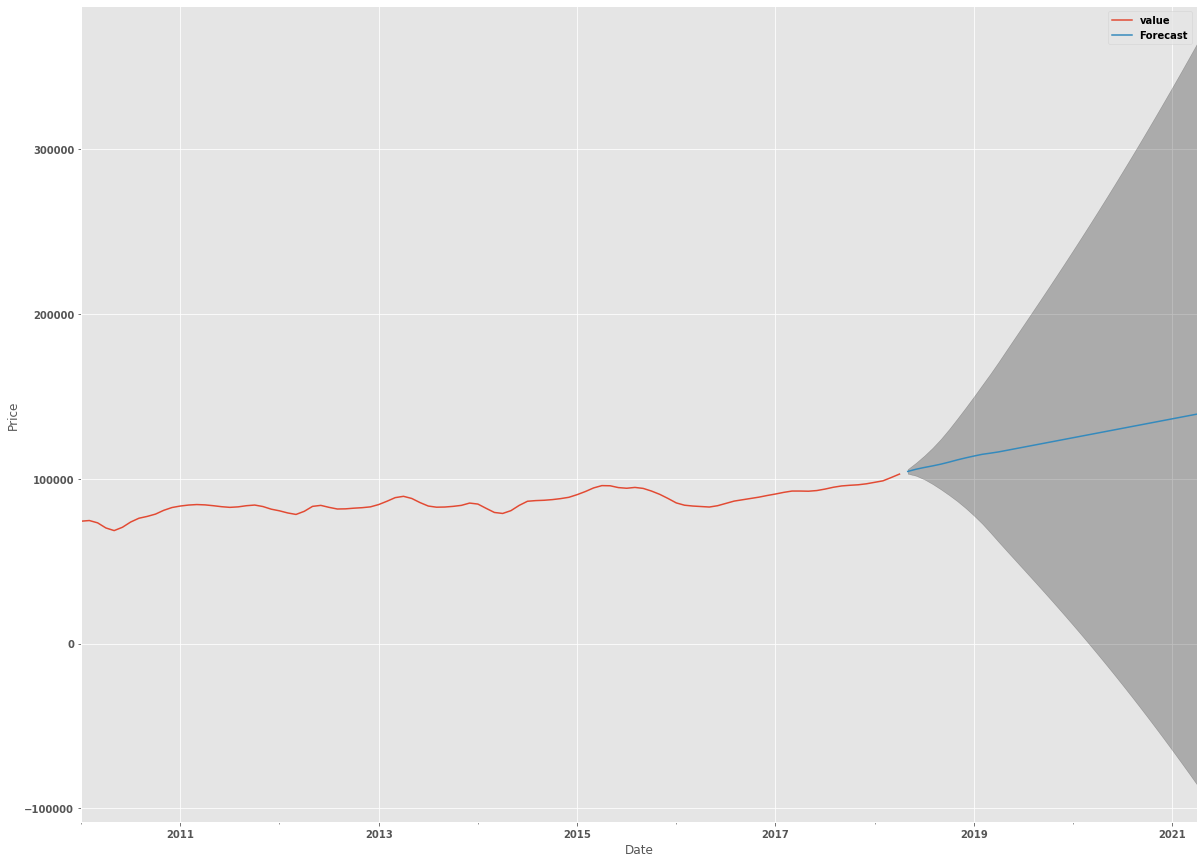

In [192]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()